In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
#from keras.layers.recurrent import LSTM


In [ ]:
input_len = 14
output_len = 1
seq_len_total = input_len + output_len

data_path1 = '=/ap and time/14input_1output_Randomize.csv'
xy_before_process = np.loadtxt(data_path1, delimiter=",", dtype=np.str)
data = pd.read_csv('/ap and time/14input_1output_Randomize.csv')

print("Processing data...")
# process the data from the csv file
processed_data = []
for rows in xy_before_process:
    temp_processed_data_1 = []
    for i in range((seq_len_total)):
        temp_processed_data_2 = []
        for j in range(int((len(rows) / (seq_len_total + 0)) * i),int((len(rows) / (seq_len_total + 0)) * (i + 1)),):
            rows[j] = rows[j].replace("[", "")
            rows[j] = rows[j].replace("]", "")
            rows[j] = rows[j].replace('"', "")
            temp_processed_data_2.append(float(rows[j]))
        temp_processed_data_1.append(temp_processed_data_2)
    processed_data.append(temp_processed_data_1)
# print(processed_data)
# print(np.shape(processed_data))
# print(type(processed_data))

processed_data2 = np.array(processed_data)

#np.random.shuffle(processed_data2)
total_data = processed_data2


print("Done processing data.")
print(np.shape(total_data))
print(type(total_data))



# Spliting training and testing data.
# If train_size is 0.7, 70% training and 30% test
# No validation data
train_data_length = int(0.9 * len(total_data))
train_data = total_data[0:train_data_length]
test_data = total_data[train_data_length:len(total_data)]


#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)


print("train_data_shape: ", np.shape(train_data))
print("test_data_shape: ", np.shape(test_data))


C:\Users\Jaffar Ali\AppData\Local\Temp\ipykernel_24596\2954216711.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xy_before_process = np.loadtxt(data_path1, delimiter=",", dtype=np.str)


Processing data...
Done processing data.
(5823, 15, 29)
<class 'numpy.ndarray'>
train_data_shape:  (5240, 15, 29)
test_data_shape:  (583, 15, 29)


In [ ]:
data.shape

(5822, 15)

In [ ]:
x_train = train_data[:,:input_len,:]#.reshape(2000,30,34)
x_train_AP = train_data[:,:input_len,:12]#.reshape(2000,30,34)
y_train_AP = train_data[:,input_len:,:12].reshape(train_data.shape[0],12)
x_train_T = train_data[:,:input_len,12:]#.reshape(2000,30,34)
y_train_T = train_data[:,input_len:,12:].reshape(train_data.shape[0],17)

x_test = test_data[:,:input_len,:]#.reshape(2000,30,34)
x_test_AP = test_data[:,:input_len,:12]#.reshape(361,30,34)
y_test_AP = test_data[:,input_len:,:12].reshape(test_data.shape[0],12)
x_test_T = test_data[:,:input_len,12:]#.reshape(361,30,34)
y_test_T = test_data[:,input_len:,12:].reshape(test_data.shape[0],17)

print(x_train.shape)
print(x_train_AP.shape)
print(y_train_AP.shape)
print(x_train_T.shape)
print(y_train_T.shape)


print(x_test.shape)
print(x_test_AP.shape)
print(y_test_AP.shape)
print(x_test_T.shape)
print(y_test_T.shape)

(5240, 14, 29)
(5240, 14, 12)
(5240, 12)
(5240, 14, 17)
(5240, 17)
(583, 14, 29)
(583, 14, 12)
(583, 12)
(583, 14, 17)
(583, 17)


In [ ]:
type(x_train.shape)

tuple

In [ ]:
# lstm1 = tf.keras.layers.LSTM(units=128, batch_input_shape=(7,2,10))(input_layer)
# lstm1

# lstm = tf.keras.layers.LSTM(units=3, batch_input_shape=(8,2,10), return_sequences=False)
# lstm

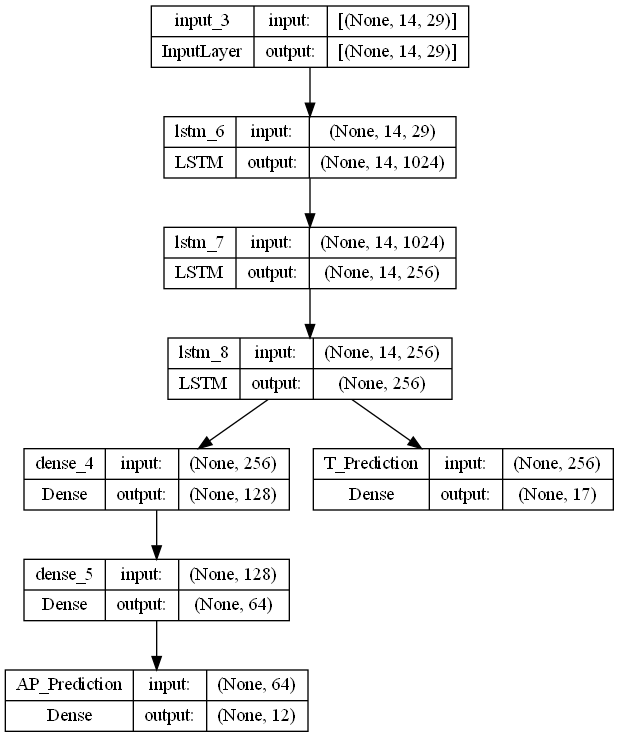

In [ ]:
input_layer = tf.keras.layers.Input(shape=(input_len, 29,))

# lstm1 = tf.keras.layers.LSTM(units=128)(input_layer)

lstm1 = tf.keras.layers.LSTM(units=1024, return_sequences=True)(input_layer)

lstm2 = tf.keras.layers.LSTM(units=256, return_sequences=True)(lstm1)

lstm3 = tf.keras.layers.LSTM(units=256, return_sequences=False)(lstm2)
# lstm2 = tf.keras.layers.LSTM(units=128)(lstm1)

# lstm3 = tf.keras.layers.LSTM(units=128)(lstm2)

# lstm4 = tf.keras.layers.LSTM(units=128, return_sequences=False)(lstm3)

hidden_layer = tf.keras.layers.Dense(128)(lstm3)

hidden_layer1 = tf.keras.layers.Dense(64)(hidden_layer)


AP_output = tf.keras.layers.Dense(12, activation='softmax', name= 'AP_Prediction')(hidden_layer1)

AP_output1 = tf.squeeze(AP_output)

T_output = tf.keras.layers.Dense(17, activation='sigmoid', name= 'T_Prediction')(lstm3)

output_list = [AP_output, T_output]

model1 = tf.keras.Model(inputs = input_layer, outputs = output_list)

#model1.compile(optimizer = tf.keras.optimizers.RMSprop(1e-3), loss = ['categorical_crossentropy', 'mse'], metrics = ['acc'])

tf.keras.utils.plot_model(model1,show_shapes = True)

In [ ]:
loss1 = tf.keras.losses.BinaryCrossentropy()
loss2 = tf.keras.losses.MeanSquaredError()
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["BinaryAccuracy"]

losses = {
    "AP_Prediction": loss1,
    "T_Prediction": loss2
}

model1.compile(loss=losses, optimizer = optim, metrics={'AP_Prediction': 'accuracy', 'T_Prediction': 'mae'})
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 14, 29)]     0           []                               
                                                                                                  
 lstm_6 (LSTM)                  (None, 14, 1024)     4317184     ['input_3[0][0]']                
                                                                                                  
 lstm_7 (LSTM)                  (None, 14, 256)      1311744     ['lstm_6[0][0]']                 
                                                                                                  
 lstm_8 (LSTM)                  (None, 256)          525312      ['lstm_7[0][0]']                 
                                                                                            

In [ ]:
y= {"AP_Prediction": y_train_AP,
    "T_Prediction": y_train_T }


history = model1.fit(x_train, y=y, epochs=150, batch_size=90, verbose=1)

Epoch 1/150
59/59 [==============================] - 6s 30ms/step - loss: 0.4067 - AP_Prediction_loss: 0.2494 - T_Prediction_loss: 0.1574 - AP_Prediction_accuracy: 0.3218 - T_Prediction_mae: 0.3210
Epoch 2/150
59/59 [==============================] - 2s 30ms/step - loss: 0.3817 - AP_Prediction_loss: 0.2300 - T_Prediction_loss: 0.1518 - AP_Prediction_accuracy: 0.3208 - T_Prediction_mae: 0.3086
Epoch 3/150
59/59 [==============================] - 2s 30ms/step - loss: 0.3797 - AP_Prediction_loss: 0.2282 - T_Prediction_loss: 0.1516 - AP_Prediction_accuracy: 0.3416 - T_Prediction_mae: 0.3070
Epoch 4/150
59/59 [==============================] - 2s 30ms/step - loss: 0.3798 - AP_Prediction_loss: 0.2282 - T_Prediction_loss: 0.1516 - AP_Prediction_accuracy: 0.3353 - T_Prediction_mae: 0.3064
Epoch 5/150
59/59 [==============================] - 2s 30ms/step - loss: 0.3795 - AP_Prediction_loss: 0.2279 - T_Prediction_loss: 0.1516 - AP_Prediction_accuracy: 0.3336 - T_Prediction_mae: 0.3066
Epoch 6/15

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'AP_Prediction_loss', 'T_Prediction_loss', 'AP_Prediction_accuracy', 'T_Prediction_mae'])


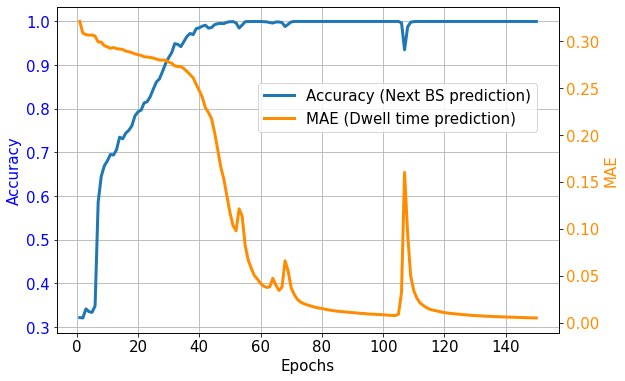

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and MAE values from history
training_accuracy = history.history['AP_Prediction_accuracy']
mae_values = history.history['T_Prediction_mae']

epochs = range(1, len(training_accuracy) + 1)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot accuracy on primary y-axis (left)
ax1.plot(epochs, training_accuracy, label='Accuracy (Next BS prediction)', linewidth=3)
ax1.set_xlabel('Epochs', fontsize = 15)
ax1.set_ylabel('Accuracy', color='blue', fontsize = 15)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(epochs, mae_values, 'darkorange', label='MAE (Dwell time prediction)', linewidth=3)
ax2.set_ylabel('MAE', color='darkorange', fontsize = 15)
ax2.tick_params(axis='y', labelcolor='darkorange')

# Increase fontsize of xticks and yticks
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Additional formatting
#plt.title('Training Accuracy and MAE vs Epochs')
ax1.grid(True)

# Display legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=15, bbox_to_anchor=(0.97, 0.790))

plt.show()


In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 22, 29)]     0           []                               
                                                                                                  
 lstm_3 (LSTM)                  (None, 22, 1024)     4317184     ['input_2[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  (None, 22, 256)      1311744     ['lstm_3[0][0]']                 
                                                                                                  
 lstm_5 (LSTM)                  (None, 256)          525312      ['lstm_4[0][0]']                 
                                                                                            

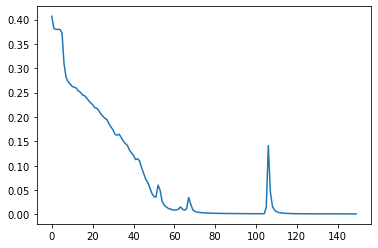

In [ ]:
loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
pred = model1.predict(x_test)
print(pred)
print('-----')

19/19 [==============================] - 91s 5s/step
[array([[7.4698255e-23, 1.0000000e+00, 1.5248292e-23, ..., 2.2261630e-19,
        1.2339628e-17, 1.5679887e-17],
       [9.8304663e-11, 1.7747567e-12, 1.0115700e-18, ..., 6.7565782e-19,
        1.0000000e+00, 3.5485265e-16],
       [1.0025893e-12, 1.0000000e+00, 6.2482779e-15, ..., 2.5055484e-13,
        1.6216656e-11, 1.2878356e-17],
       ...,
       [1.0000000e+00, 2.6114113e-18, 2.1103286e-18, ..., 1.1182205e-18,
        1.0814423e-17, 4.1604976e-18],
       [1.0000000e+00, 1.6694266e-18, 2.1182546e-20, ..., 1.4047689e-18,
        2.8501994e-17, 7.3048856e-17],
       [3.8720425e-16, 1.0000000e+00, 1.0838190e-21, ..., 1.2854587e-19,
        5.7430514e-13, 4.7463728e-15]], dtype=float32), array([[1.13431015e-05, 5.19643754e-06, 1.21100984e-05, ...,
        5.26486384e-03, 9.92117941e-01, 3.07957130e-03],
       [9.48583818e-07, 8.61602985e-06, 1.66343784e-06, ...,
        9.93062079e-01, 1.48254388e-03, 2.20706407e-02],
       [4

In [ ]:
pred[0]

array([[7.4698255e-23, 1.0000000e+00, 1.5248292e-23, ..., 2.2261630e-19,
        1.2339628e-17, 1.5679887e-17],
       [9.8304663e-11, 1.7747567e-12, 1.0115700e-18, ..., 6.7565782e-19,
        1.0000000e+00, 3.5485265e-16],
       [1.0025893e-12, 1.0000000e+00, 6.2482779e-15, ..., 2.5055484e-13,
        1.6216656e-11, 1.2878356e-17],
       ...,
       [1.0000000e+00, 2.6114113e-18, 2.1103286e-18, ..., 1.1182205e-18,
        1.0814423e-17, 4.1604976e-18],
       [1.0000000e+00, 1.6694266e-18, 2.1182546e-20, ..., 1.4047689e-18,
        2.8501994e-17, 7.3048856e-17],
       [3.8720425e-16, 1.0000000e+00, 1.0838190e-21, ..., 1.2854587e-19,
        5.7430514e-13, 4.7463728e-15]], dtype=float32)

In [ ]:
a = 0
b = 0


for i in range(len(y_test_AP)):

    if np.argmax((y_test_AP[i])) == np.argmax((pred[0][i])):#  or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-2]) or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-3])::
        a = a+1

    if np.argmax((y_test_AP[i])) != np.argmax((pred[0][i])):
        b = b+1

acc= 100*(a/len(y_test_AP))
acc

97.963466124

In [ ]:
a = 0
b = 0


for i in range(len(y_test_AP)):

    if np.argmax((y_test_AP[i])) == np.argmax((pred[0][i]))  or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-2]):# or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-3])::
        a = a+1

    if np.argmax((y_test_AP[i])) != np.argmax((pred[0][i])):
        b = b+1

acc= 100*(a/len(y_test_AP))
acc

99.4

In [ ]:
a = 0
b = 0


for i in range(len(y_test_AP)):

    if np.argmax((y_test_AP[i])) == np.argmax((pred[0][i]))  or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-2]) or np.argmax((y_test_AP[i])) == list(pred[0][i]).index(sorted(pred[0][i])[-3]):
        a = a+1

    if np.argmax((y_test_AP[i])) != np.argmax((pred[0][i])):
        b = b+1

acc= 100*(a/len(y_test_AP))
acc

100

In [ ]:
for i in range(len(pred[1])):
    for j in range(17):
        if pred[1][i][j] > 0.5:
            pred [1][i][j] = 1
        if pred[1][i][j] < 0.5:
            pred [1][i][j] = 0

In [ ]:
error = 0
Ttime_GT = []
Ttime_pred = []

for i in range(len(y_test_T)):
    Ttime_GT1 = 0
    Ttime_pred1 = 0
    pred_nn = np.flip(pred[1][i])
    y_test_TT = np.flip(y_test_T[i])

    for j in range(17):
        Ttime_G = (y_test_TT[j])*pow(2,j) #*2 power j
        Ttime_GT1 = Ttime_GT1 + Ttime_G

        Ttime_p = pred_nn[j]*pow(2,j) #*2 power j
        Ttime_pred1 = Ttime_pred1 + Ttime_p
        #         print(j)
    Ttime_GT.append(Ttime_GT1)
    Ttime_pred.append(Ttime_pred1)

#      err =y_test_T[i]-pred[1][i]

#     error = error + err


for i in range(len(Ttime_GT)):
    err = abs(Ttime_GT[i]-Ttime_pred[i])
    error = error +  err



Avg_error = error/len(Ttime_GT)
Avg_error

19.2

In [ ]:
from sklearn.metrics import mean_squared_error
def RMSE(true, pred):
    RMSE = mean_squared_error(true, pred, squared = False)
    return RMSE

In [ ]:
RMSE(Ttime_GT, Ttime_pred)

197.1659958685345

In [ ]:
totalDwellT = 0

for i in range(len(Ttime_GT)):
    totalDwellT= Ttime_GT[i]+totalDwellT




totalDwellT/(len(Ttime_GT))

743.7135506003431